In [6]:
# Cargar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Cargar el dataset
file_path = "vehicles.csv"
data = pd.read_csv(file_path)

# Visualizar las primeras filas del dataset
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
# Estructura del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe(include="all"))

# Detección de valores nulos
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [9]:
# Eliminación de duplicados
data = data.drop_duplicates()

# Manejo de valores faltantes
data = data.dropna(subset=['price', 'odometer', 'year', 'condition'])

# Filtrar precios irreales
data = data[(data['price'] > 1000) & (data['price'] < 100000)]

# Codificación de variables categóricas
data['condition'] = data['condition'].astype('category').cat.codes
data['type'] = data['type'].astype('category').cat.codes
data['paint_color'] = data['paint_color'].astype('category').cat.codes

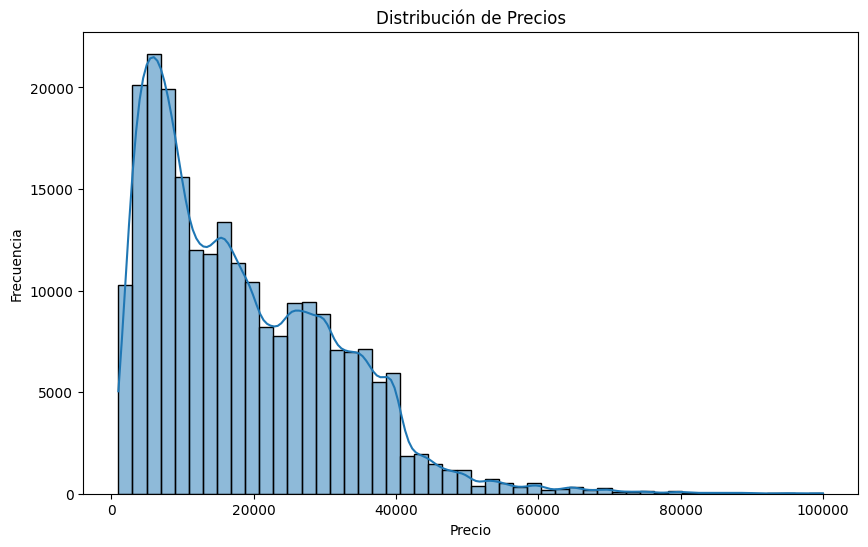

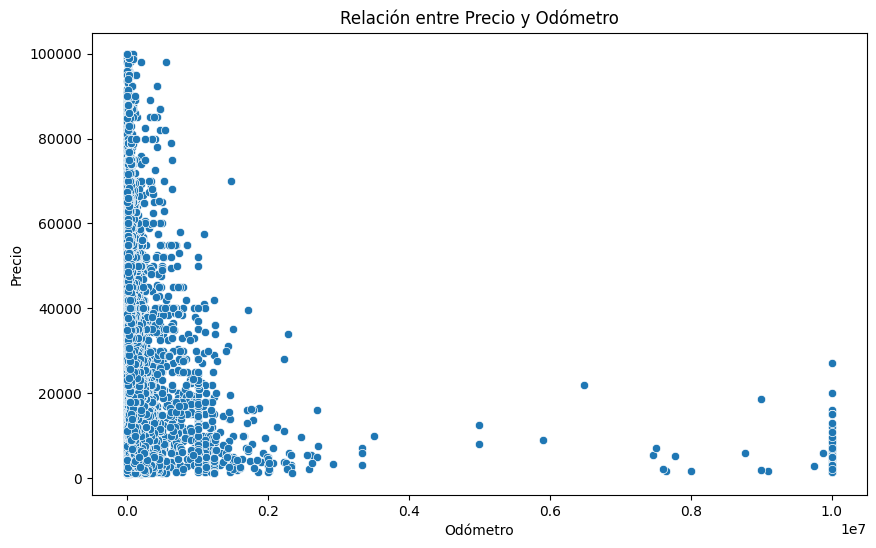

In [10]:
# Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre precio y odómetro
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['odometer'], y=data['price'])
plt.title("Relación entre Precio y Odómetro")
plt.xlabel("Odómetro")
plt.ylabel("Precio")
plt.show()

In [11]:
# Selección de características y variable objetivo
X = data[['year', 'odometer', 'condition']]
y = data['price']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"MSE (Linear Regression): {mse_linear}")
print(f"R² (Linear Regression): {r2_linear}")

MSE (Linear Regression): 144318826.82464746
R² (Linear Regression): 0.18047722710189418


In [13]:
# Modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE (Random Forest): {mse_rf}")
print(f"R² (Random Forest): {r2_rf}")

MSE (Random Forest): 51694356.25551801
R² (Random Forest): 0.7064506196881762


In [14]:
# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Ajustar el modelo con GridSearch
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Predicción y evaluación del modelo optimizado
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"MSE (Best Random Forest): {mse_best_rf}")
print(f"R² (Best Random Forest): {r2_best_rf}")

MSE (Best Random Forest): 51141848.845859654
R² (Best Random Forest): 0.7095880648460428


In [15]:
# Resultados comparativos
results = pd.DataFrame({
    "Modelo": ["Linear Regression", "Random Forest", "Optimized Random Forest"],
    "MSE": [mse_linear, mse_rf, mse_best_rf],
    "R²": [r2_linear, r2_rf, r2_best_rf]
})

print(results)

                    Modelo           MSE        R²
0        Linear Regression  1.443188e+08  0.180477
1            Random Forest  5.169436e+07  0.706451
2  Optimized Random Forest  5.114185e+07  0.709588
